In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

In [2]:
x = np.arange(10).reshape(-1,1) # reshape(-1,1) сделать из строки столбец
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4)  # разбивка данных на тренировочную и тестовую test_size это процент тестовой выборки из всех элементов, 0.4 - 40%
t = to_categorical(y) # перевод переменной у в категориальные переменные два столбца это два класса, строки это принадлежность элемента к определенному классу
t

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [4]:
network = models.Sequential() # Создание модели нейронки Sequential() значит последовательная модель в конце будет видно
network.add(layers.Dense(20, activation='relu', name = 'LayerInput')) # add() добавление слоев в модель, 20 Положительное целое число размерность выходного пространства то есть количество нейронов, activation - функция активации, name - необязательное для отображения названия слоя на графике ниже
network.add(layers.Dense(2, activation='softmax', name= 'LayerTwo')) # в последнем слое количество выходных нейронов должно быть равно количеству классов которые у нас есть в данном случае 0 и 1 то есть 2 класса
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])  # optimizer= строка (имя оптимизатора) или экземпляр оптимизатора https://www.tensorflow.org/api_docs/python/tf/keras/optimizers написано какие есть оптимизаторы, loss= функция потери на https://www.tensorflow.org/api_docs/python/tf/keras/losses можно посмотреть какие есть функции. metrics= список метрик (их может быть несколько поэтому [], которые будут оцениваться моделью во время обучения и тестирования на https://www.tensorflow.org/api_docs/python/tf/keras/metrics


In [5]:
network.fit(x, t, epochs=100, batch_size=10, verbose=1) # Обучение модели х это массив на которых нужно обучить модель, t созданный массив категориальных переменных epochs - данные х и t сто раз прошли через нейронную сеть в прямом и обратном направлении, batch_size - это количество выборок, которые передаются в сеть одновременно, то есть количесво элементов тестовой выборки. verbose= количество отображаемой информации при обучении 1 - много информации 3 - только эпохи

Epoch 1/100
1/1 [==============================] - 1s 800ms/step - loss: 0.4730 - accuracy: 0.7000
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.4674 - accuracy: 0.7000
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.7000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7000
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.4613 - accuracy: 0.7000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7000
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4584 - accuracy: 0.7000
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.4571 - accuracy: 0.7000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.4558 - accuracy: 0.7000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4545 - accuracy: 0.7000
Epoch 11/100
1/1 [============

In [6]:
z = network.predict(x, verbose= 1) # Генерирует предсказания для входного массива х, verbose аналогично fit(), возвращает Numpy массив(ы) предсказаний вероятности где каждый столбец это класс
print(z)

1/1 [==============================] - 0s 106ms/step
[[0.58677447 0.41322544]
 [0.6025528  0.3974472 ]
 [0.47552496 0.524475  ]
 [0.3514029  0.6485971 ]
 [0.24457128 0.7554287 ]
 [0.16210097 0.8378991 ]
 [0.10362515 0.8963749 ]
 [0.06461698 0.93538296]
 [0.03964346 0.9603566 ]
 [0.02407342 0.9759266 ]]


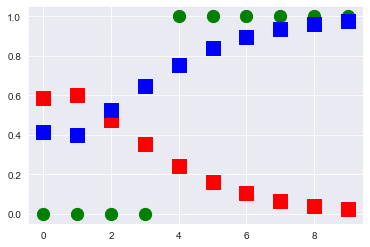

In [11]:
plt.scatter(x, y, color='green', s=150, marker="o") # график исходных данных
plt.scatter(x, z[:, 0], color='red', s=175, marker="s")  # график предсказанных данных для класса 0
plt.scatter(x, z[:, 1], color='blue', s=175, marker="s") # график предсказанных данных для класса 1

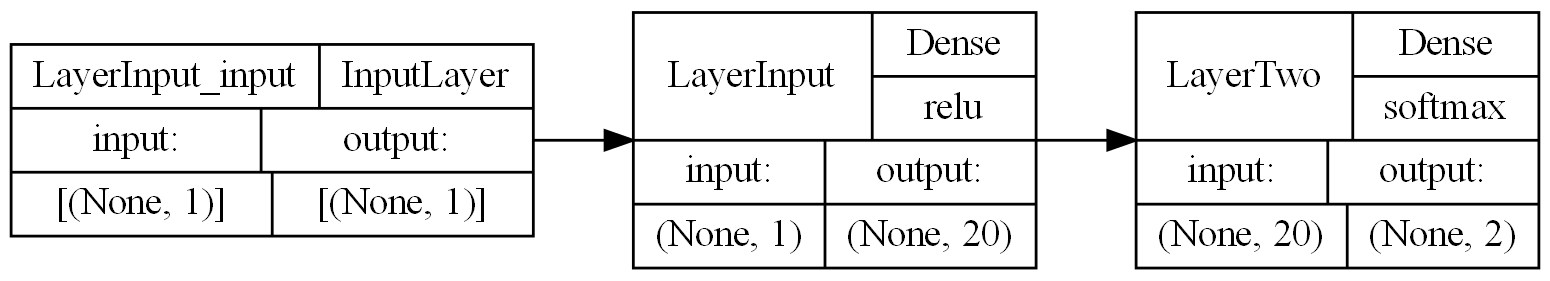

In [12]:
plot_model(network, show_shapes=True, show_layer_names=True, rankdir="LR", dpi=200, show_layer_activations=True) # network модель нейронной сети, show_shapes - отображать ли информацию о форме это ([None,1]), show_layer_names названия слоев которые были введены при создании модели нейронки, rankdir="LR" - рисунок горизонтально, 'TB' - вертикально, dpi разрешение show_layer_activations отображение активаций слоев (только для слоев, у которых есть activation свойство).


# может вывести вот такую ошибку - You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
# помогла вот эта установка в консоли анаконды -  conda install pydot